In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

C:\Users\frase\AppData\Local\Temp\ipykernel_18424\1521273946.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data  = pd.read_csv("q2_data/02476922.csv", sep = ",")
print(data)

            y          X1        X2        X3        X4        X5         X6  \
0    0.186523  619.249371  1.061891  0.587389  0.744153  0.861010  32.049851   
1   -0.163487  464.183653  1.103821  0.671218  0.635681  0.814718  29.374385   
2    0.015296  495.602197  1.051137  0.211731  0.762325  0.810129  26.010991   
3    0.149404  518.912729  1.258446  0.810497  0.666929  0.762864  35.969842   
4    0.119566  518.912729  1.115723  0.706603  0.722990  0.861847  31.789283   
..        ...         ...       ...       ...       ...       ...        ...   
495 -0.041340  620.262872  1.100455  0.685726  0.776428  0.828093  34.133318   
496  0.100962  398.306060  1.038271  0.315676  0.791149  0.890773  23.552869   
497  0.573972  226.010818  1.067485  0.569371  0.670612  0.899922  19.319159   
498  0.244850  689.180969  1.076677  0.645183  0.772205  0.881674  34.892932   
499  0.332942  555.398781  1.199237  0.785359  0.762770  0.810398  35.715011   

            X7         X8        X9  ..

In [3]:
y = data.values[:,0]
X = data.values[:,1:]

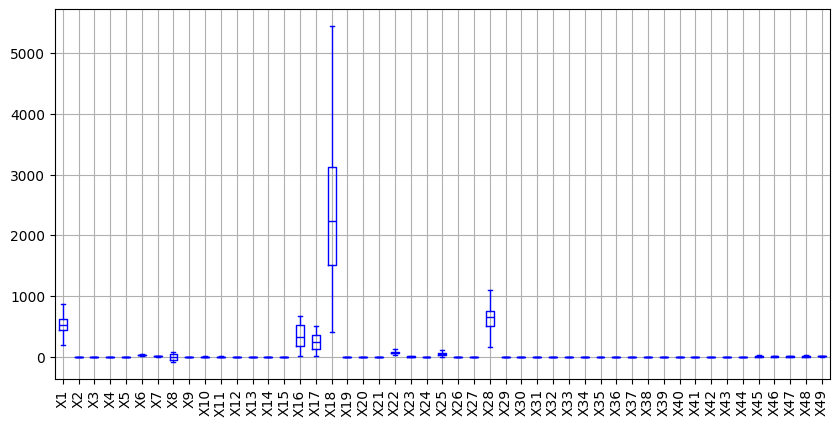

<Figure size 1000x480 with 0 Axes>

In [4]:
#boxplot
plt.figure().set_figwidth(10)
axs= data.iloc[:,1:].boxplot(rot = 90,showfliers = False,color = "blue")

plt.show()
plt.figure().set_figwidth(10)

In [5]:
import seaborn as sns 
#sns.pairplot(data)

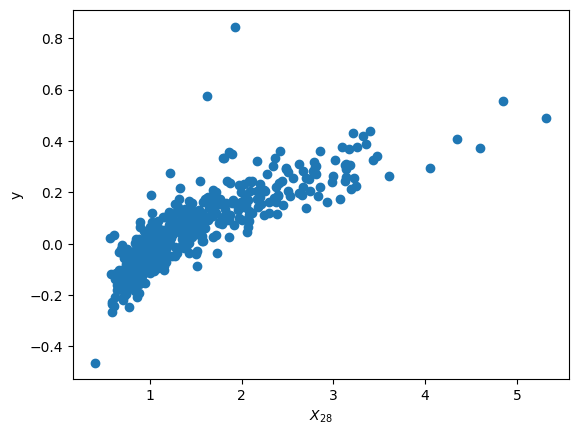

In [6]:
#plots of variables
plt.scatter(X[:,28],y)
plt.xlabel("$X_{28}$")
plt.ylabel("y")
plt.show()

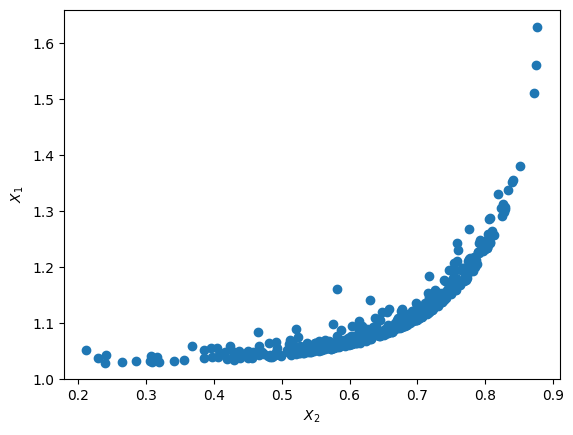

In [7]:
plt.scatter(X[:,2],X[:,1])
plt.xlabel("$X_{2}$")
plt.ylabel("$X_{1}$")
plt.show()

In [8]:
### 2 ###
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state= 2476922)

In [9]:
### scale using training set ###
#do test first before train is altered
X_test = (X_test - X_train.mean())/X_train.std()
X_train = (X_train - X_train.mean())/X_train.std()

In [10]:
def mse(preds, true):
    return np.mean((preds - true)**2)

Best alpha: 2.5527013026612473e-10


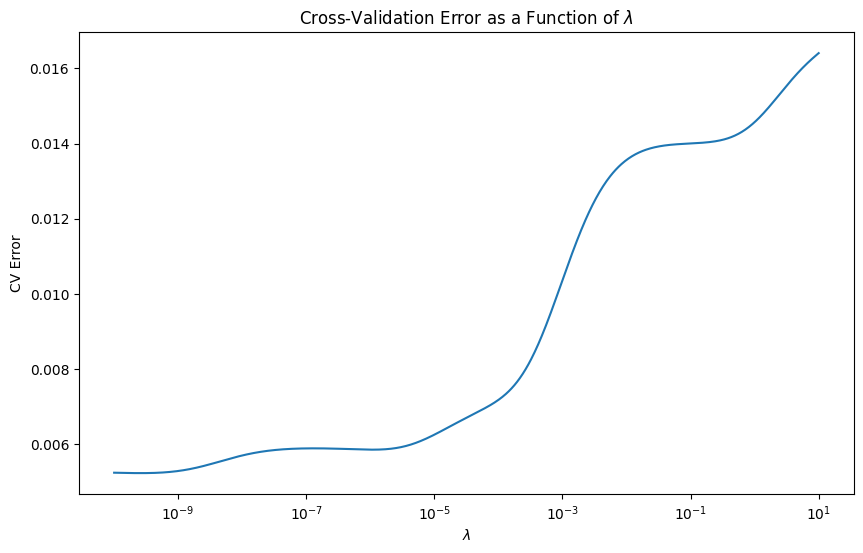

In [11]:
### Approach one - regression ###

from sklearn.linear_model import RidgeCV

# Define a range of alpha values
alphas = np.logspace(-10, 1, 1001)

# Perform a LOOCV for ridge regression with each alpha value
ridge_cv = RidgeCV(alphas=alphas, fit_intercept=True, store_cv_values=True).fit(X_train, y_train)

# Calculate the mean CV error for each alpha
cv_errors = ridge_cv.cv_values_.mean(axis=0)
print("Best alpha:", ridge_cv.alpha_)
# Plot the CV error for each alpha
plt.figure(figsize=(10, 6))
plt.plot(ridge_cv.alphas, np.squeeze(cv_errors))
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('CV Error')
plt.title('Cross-Validation Error as a Function of $\lambda$')
plt.show()

In [12]:
#linear regression for later
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True).fit(X_train,y_train)

In [13]:
# see coefficients for each for interest
names = ['b'+str(i) for i in range(1, 50)]
names.insert(0,'a')
print(names)
ridge_coeffs = np.concatenate([np.array([ridge_cv.intercept_]),ridge_cv.coef_])
lr_coefs = np.concatenate([np.array([lr.intercept_]),lr.coef_])
# Create a DataFrame
df = pd.DataFrame({
'Name': names,
'Linear Regression Coefficients': np.squeeze(lr_coefs),
'RidgeCV Coefficients': np.squeeze(ridge_coeffs)
})

print(df)


['a', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9', 'b10', 'b11', 'b12', 'b13', 'b14', 'b15', 'b16', 'b17', 'b18', 'b19', 'b20', 'b21', 'b22', 'b23', 'b24', 'b25', 'b26', 'b27', 'b28', 'b29', 'b30', 'b31', 'b32', 'b33', 'b34', 'b35', 'b36', 'b37', 'b38', 'b39', 'b40', 'b41', 'b42', 'b43', 'b44', 'b45', 'b46', 'b47', 'b48', 'b49']
   Name  Linear Regression Coefficients  RidgeCV Coefficients
0     a                    -1143.152732           2874.657546
1    b1                        0.301363              0.303847
2    b2                       96.470110             97.757982
3    b3                      -39.917913            -29.415217
4    b4                       46.984458             46.975717
5    b5                      -13.918610            -16.044517
6    b6                       -0.444722             -0.947759
7    b7                       -0.194060             -0.592149
8    b8                        0.022889              0.022876
9    b9                      249.876278 

1
2
3
4
5
6
7
8
9
The best depth found was: 4


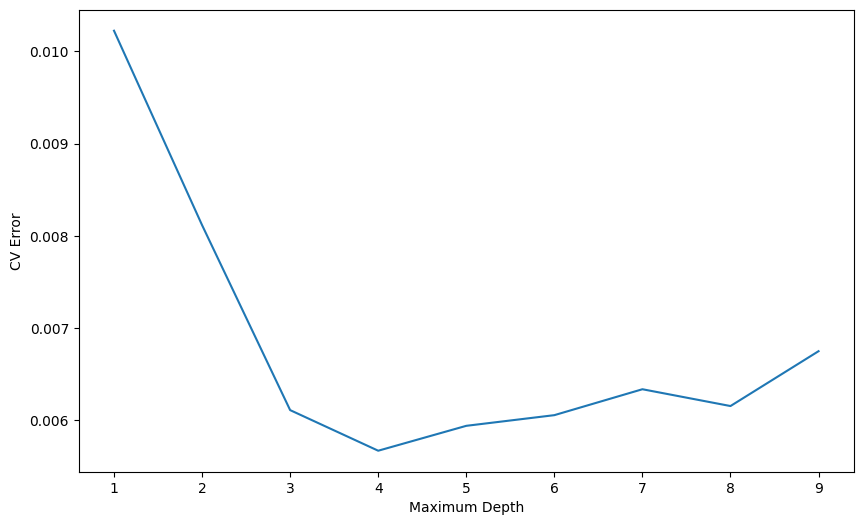

In [14]:
### Decision Tree ###

from sklearn.tree import DecisionTreeRegressor

#setup the depth array
depths = np.arange(1,10)
#list to store MSEs in
mse_list = []
for depth in depths:
    MSE = 0
    print(depth)
    for i in range(0,X_train.shape[0]):
        #setup loocv train and test
        x_train = np.concatenate([X_train[:i,:] ,X_train[(i+1):,:]], axis = 0)
        x_test = X_train[i,:][None,:]
        y_tr= np.concatenate([y_train[:i] ,y_train[(i+1):]], axis = 0)
        y_te = y_train[i]
        #fit
        dt = DecisionTreeRegressor(max_depth=depth,min_samples_split=5,random_state=1).fit(x_train,y_tr)
        #predict
        MSE += mse(dt.predict(x_test),y_te)
    mse_list.append(MSE/X_train.shape[0])

#plot
depth_best = depths[np.argmin(mse_list)]
print(f"The best depth found was: {depth_best}")
plt.figure(figsize=(10, 6))
plt.plot(depths,mse_list)
plt.xlabel("Maximum Depth")
plt.ylabel("CV Error")
plt.show()

#final one
dt = DecisionTreeRegressor(max_depth=depth_best,min_samples_split=5,random_state=1).fit(x_train,y_tr)

In [15]:
### Random Forest ###

from sklearn.ensemble import RandomForestRegressor

#adapted from tutorial 4
# range for the number of predictors considered at each split
mtrys = list(range(1, 199, 10))
# range of values considered for the maximum number of leaf nodes
maxnodes = list(range(20, 100, 10))

# initialize the matrix of out-of-bag scores
oob_scores = np.zeros((len(mtrys), len(maxnodes)))

print('Training models...')
for i, mtry in enumerate(mtrys):
    print(f'Progress: {round(i / len(mtrys) * 100, 2)}%', end='\r')
    for j, maxnode in enumerate(maxnodes):
        #create model
        model = RandomForestRegressor(n_estimators=100,oob_score=True, max_features=mtry, max_leaf_nodes=maxnode, random_state=2476922, max_depth=5)
        model.fit(X_train, y_train)
        #get oob scores
        oob_scores[i, j] = mse(model.oob_prediction_, y_train)
print('Finished!')

Training models...
Finished! 95.0%


In [16]:
#best parameters
idx_mtry, idx_maxnode = np.unravel_index(np.argmin(oob_scores), oob_scores.shape)
mtry = mtrys[idx_mtry]
maxnode = maxnodes[idx_maxnode]
print(f'Best mtry: {mtry}')
print(f'Best maxnode: {maxnode}')

#best one
rf = RandomForestRegressor(max_features=mtry, max_leaf_nodes=maxnode, random_state=2476922, max_depth=5).fit(X_train,y_train)

Best mtry: 31
Best maxnode: 30


In [17]:
### Neural Network ###
import tensorflow as tf

# A multi-layer perectron (a linear stack of layers) is defined in the Sequential class in keras.
nn = tf.keras.Sequential([
    tf.keras.layers.Dense(1000, input_dim=49, activation='relu'),
    tf.keras.layers.Dense(1)
])

nn.summary()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
nn.compile(optimizer=optimizer, loss='mse')



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              50000     
                                                                 
 dense_1 (Dense)             (None, 1)                 1001      
                                                                 
Total params: 51001 (199.22 KB)
Trainable params: 51001 (199.22 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
#hyperparameters
epochs = 500
batch = 64
val_split = 0.2
#validation set split
x_train2, x_val2, y_train2, y_val2 = train_test_split(X_train, y_train, test_size=val_split, random_state=2476922)

history = nn.fit(x_train2, y_train2, epochs = epochs, batch_size=batch, validation_data=(x_val2, y_val2))

Epoch 1/500

5/5 [==============================] - 0s 55ms/step - loss: 0.0387 - val_loss: 0.0333
Epoch 2/500
5/5 [==============================] - 0s 6ms/step - loss: 0.0274 - val_loss: 0.0307
Epoch 3/500
5/5 [==============================] - 0s 6ms/step - loss: 0.0258 - val_loss: 0.0301
Epoch 4/500
5/5 [==============================] - 0s 6ms/step - loss: 0.0254 - val_loss: 0.0297
Epoch 5/500
5/5 [==============================] - 0s 6ms/step - loss: 0.0251 - val_loss: 0.0295
Epoch 6/500
5/5 [==============================] - 0s 6ms/step - loss: 0.0249 - val_loss: 0.0293
Epoch 7/500
5/5 [==============================] - 0s 6ms/step - loss: 0.0247 - val_loss: 0.0290
Epoch 8/500
5/5 [==============================] - 0s 6ms/step - loss: 0.0245 - val_loss: 0.0288
Epoch 9/500
5/5 [==============================] - 0s 6ms/step - loss: 0.0245 - val_loss: 0.0286
Epoch 10/500
5/5 [==============================] - 0s 5ms/step - loss: 0.0241 - val_loss: 0.0284
Epoch 11/500
5/5 [=========

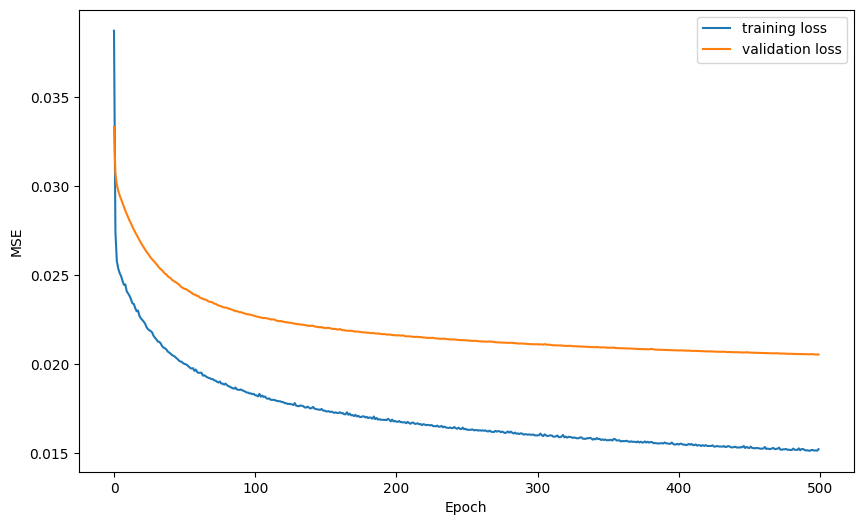

In [19]:
#plot training curve
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()
plt.show()

In [20]:
### 3 - predictions on the test set ###

#regression
mse_linear = mse(lr.predict(X_test),y_test)
mse_ridge = mse(ridge_cv.predict(X_test),y_test)
print("MSE of linear regression on the test set:", mse_linear)
print("MSE of ridge on the test set:", mse_ridge)

#decision tree
mse_dt = mse(dt.predict(X_test), y_test)
print("MSE of decision tree on the test set:", mse_dt)

#random forest
mse_rf = mse(rf.predict(X_test), y_test)
print("MSE of random forest on the test set:", mse_rf)

#neural network
mse_nn = mse(nn.predict(X_test)[:,0],y_test)
print("MSE of neural network on the test set:", mse_nn)


MSE of linear regression on the test set: 0.005069605642468587
MSE of ridge on the test set: 0.005214270744653191
MSE of decision tree on the test set: 0.0066901869541629334
MSE of random forest on the test set: 0.004371858319543816
4/4 [==============================] - 0s 1ms/step
MSE of neural network on the test set: 0.019158220276408972
